### **EXPLORATORY DATA ANALYSIS**
**IMDB**

In [5]:
 # Importing the Necessary Libraries 
import pandas as pd 
import json 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [6]:
IMDB_df = pd.read_csv( 'CLEANED_IMDB_DATA.csv' )
Rotten_Tomatoes_df = pd.read_csv( 'CLEAN_ROTTEN_TOMATOES_DATA.CSV')

In [7]:
 # Setting up the visualization style 
sns.set_style( style = 'darkgrid' )
sns.set_palette( palette = 'icefire' )

In [8]:
 # Printing the numerical and non numerical interpretation of IMDB data
display(IMDB_df.describe())
display(IMDB_df.describe(include=['object', 'category']))

,Year,Total_Ratings,Average_Rating,Runtime
count,250.000000,2.500000e+02,250.000000,250.000000
mean,1987.968000,7.164200e+05,8.309600,129.704000
std,25.560837,5.781907e+05,0.234023,29.983402
min,1921.000000,2.700000e+04,8.000000,45.000000
25%,1968.750000,2.382500e+05,8.100000,108.250000
50%,1995.000000,5.810000e+05,8.200000,127.000000
75%,2008.000000,1.075000e+06,8.400000,146.750000
max,2024.000000,3.000000e+06,9.300000,238.000000


,Title,Link,Rating_Classification,Director,Genre
count,250,250,250,250,250
unique,250,250,7,155,66
top,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=cht...,R,Christopher Nolan,Docudrama
freq,1,1,101,8,18


From the output, we observe the following key insights:  

- The dataset contains **250 unique movie titles** directed by **155 distinct directors**.  
- **Christopher Nolan** holds the highest number of films in the dataset, with **8 movies** to his name.  
- There are **66 unique genres**, with **Docudrama** being the most frequent, appearing in **18 movies**.  

Regarding ratings and runtime:  

- The average number of total ratings per movie is **716,420**, with the most-rated film receiving **3,000,000 ratings**, while the least-rated film has **27,000 ratings**.  
- The average movie rating is **8.3**, with a minimum rating of **8.0** and a maximum rating of **9.3** (out of 10).  
- The average runtime is **129.7 minutes**, with the shortest film running **45 minutes** and the longest at **238 minutes**.  

Next, we will visualize these distributions to gain a clearer understanding of the trends in the dataset.

<Figure size 2000x1000 with 0 Axes>

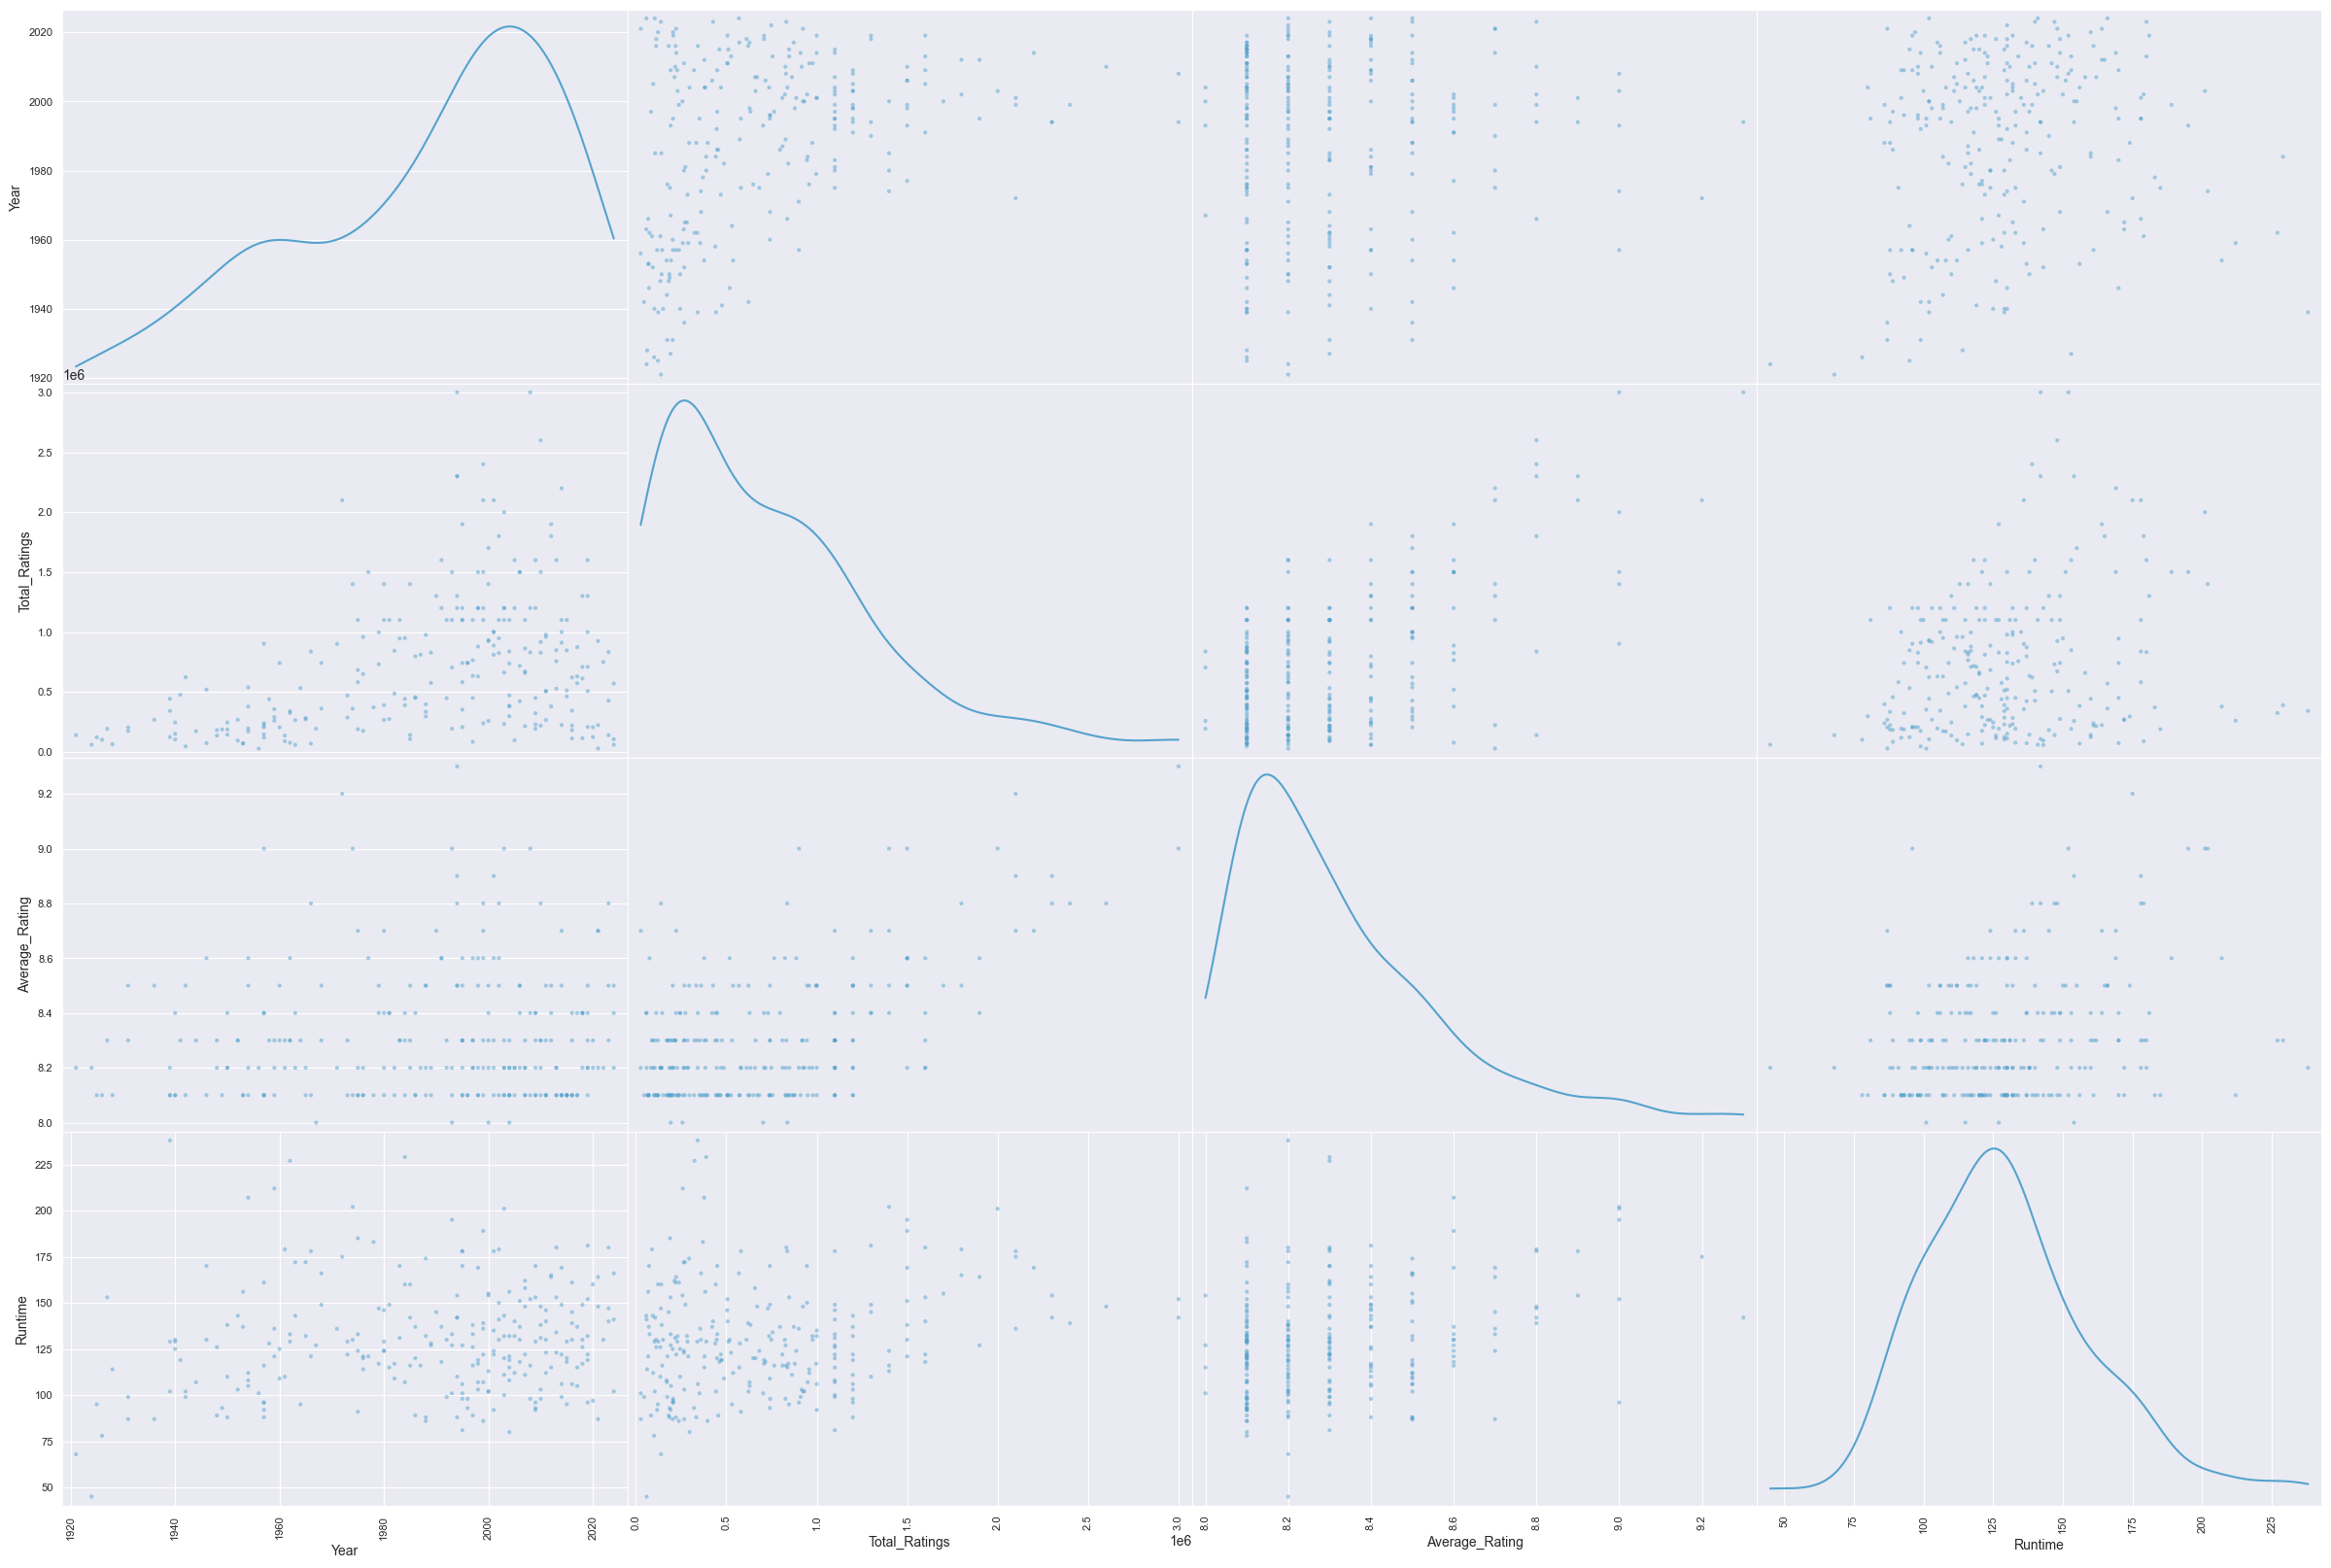

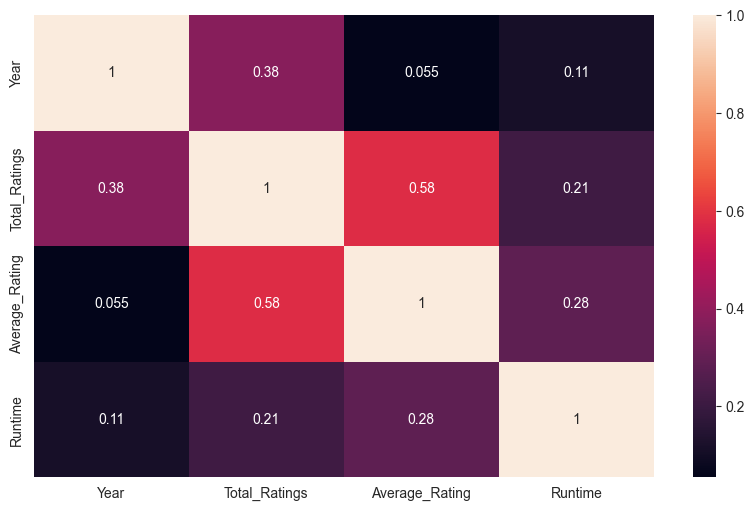

In [9]:
 # Getting the Numerical data
IMDBDATA_nums = IMDB_df.select_dtypes( include = ['float64','int64'])

 # plotting Scatter Matrix
plt.figure( figsize = (20,10) )
pd.plotting.scatter_matrix( IMDBDATA_nums , figsize = ( 30 , 20 ) , diagonal = 'kde' )

 # Correlation
corr = IMDBDATA_nums.corr()

 # ploting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap( corr ,annot = True )


plt.show()

We observe.

- None of the numerical features exhibit a **strong linear relationship** with each other.  
- **Total Ratings** is **right-skewed**, meaning most movies have relatively lower total ratings, with a few outliers having significantly high ratings.  
- **Average Rating** is also **right-skewed** .  
- **Runtime** follows a **normal distribution**, indicating that most movies have runtimes around the average, with fewer films at the extreme ends.  

From the **correlation matrix**, we observe:  

- The **correlation coefficient** between **Average Rating** and **Total Ratings** is **0.5**, indicating a **moderately positive correlation**. This suggests that higher-rated movies tend to have more total ratings, but the relationship is not strictly linear.  


<function matplotlib.pyplot.show(close=None, block=None)>

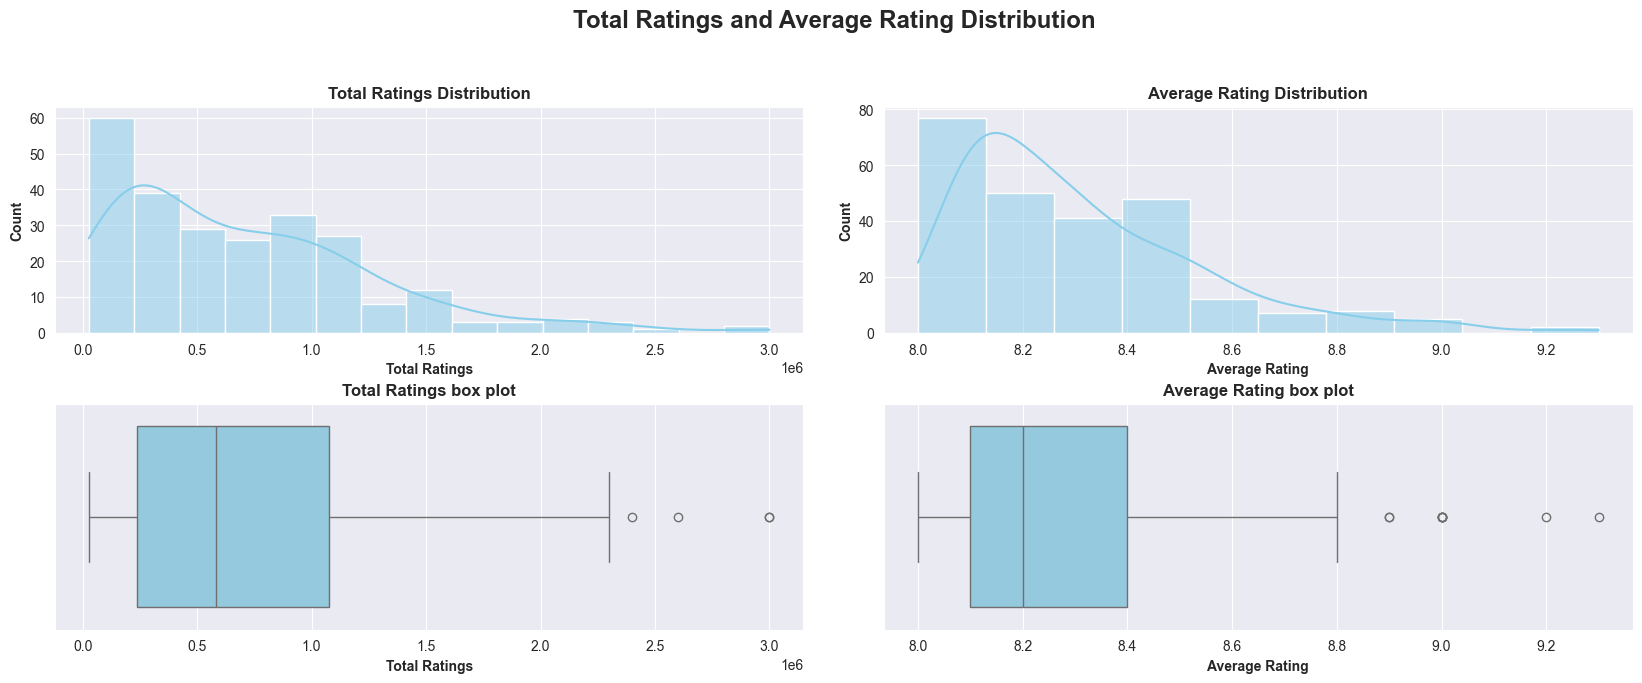

In [10]:
 # Plotting histograms
fig,ax = plt.subplots( 2 , 2 , figsize = (17 ,7) )
 # Heading of the whole plot 
fig.suptitle( 'Total Ratings and Average Rating Distribution' , fontweight = 'heavy' , size = 'xx-large' )
fig.tight_layout( pad = 3.0 )

sns.histplot( ax = ax[0,0] , data = IMDB_df , x = 'Total_Ratings' , bins = 15 , kde = True , color = 'skyblue' )
sns.histplot( ax = ax[0,1] , data = IMDB_df , x = 'Average_Rating' , bins = 10 , kde = True , color = 'skyblue' )
sns.boxplot( ax=ax[1,0], data=IMDB_df, x='Total_Ratings', color='skyblue')
sns.boxplot( ax=ax[1,1], data=IMDB_df, x='Average_Rating', color='skyblue')

ax[0,0].set_xlabel( 'Total Ratings' , fontweight = 'bold' )
ax[0,1].set_xlabel( 'Average Rating' , fontweight = 'bold' )
ax[1,0].set_xlabel( 'Total Ratings' , fontweight = 'bold' )
ax[1,1].set_xlabel( 'Average Rating' , fontweight = 'bold' )

ax[0,0].set_ylabel( 'Count' , fontweight = 'bold' )
ax[0,1].set_ylabel( 'Count' , fontweight = 'bold' )

ax[0,0].set_title( 'Total Ratings Distribution',fontweight = 'bold' )
ax[0,1].set_title( 'Average Rating Distribution',fontweight = 'bold' )
ax[1,0].set_title( 'Total Ratings box plot',fontweight = 'bold' )
ax[1,1].set_title( 'Average Rating box plot',fontweight = 'bold' )

plt.show

From the output, we observe the following about the distributions:

Total Ratings is right-skewed, meaning most films have relatively low total ratings, while a few have significantly high ratings. The box plot also indicates the presence of outliers, suggesting that some movies have exceptionally high ratings compared to the majority.
Average Rating is also right-skewed, with most films having an average rating between 8.0 and 8.6. The box plot further confirms the presence of outliers, indicating that some movies stand out with particularly high ratings.

Next, we will analyze the movies with the highest and lowest average ratings as well as those with the highest and lowest total ratings .

In [11]:
 # Getting the top 5 highest rated films in imdb 
sorted_total_rating1 = IMDB_df.sort_values( by = 'Total_Ratings' , ascending = False )
sorted_total_rating2 = IMDB_df.sort_values( by = 'Total_Ratings' , ascending = True )

display(sorted_total_rating1[['Title','Total_Ratings']].head(5))
display(sorted_total_rating2[['Title','Total_Ratings']].head(5))

,Title,Total_Ratings
0,The Shawshank Redemption,3000000
2,The Dark Knight,3000000
13,Inception,2600000
12,Fight Club,2400000
7,Pulp Fiction,2300000


,Title,Total_Ratings
238,A Man Escaped,27000
179,Demon Slayer: Kimetsu no Yaiba - Tsuzumi Mansi...,28000
239,To Be or Not to Be,46000
83,High and Low,58000
199,Maharaja,59000


From the output, we observe that **The Shawshank Redemption** and **The Dark Knight** are the most-rated films, each accumulating a total of **3 million** ratings. This indicates their immense popularity and broad audience engagement.

On the other hand, **A Man Escaped** has the lowest total ratings with **27,000**, suggesting it is a lesser-known but possibly highly regarded film among niche audiences

In [12]:
 # Getting the top 5 rated and bottom 5 rated movies
sorted_avg_rating1 =  IMDB_df.sort_values( by = 'Average_Rating' , ascending = False )
sorted_avg_rating2 =  IMDB_df.sort_values( by = 'Average_Rating' , ascending = True )

display(sorted_avg_rating1[['Title','Average_Rating']].head(5))
display(sorted_avg_rating2[['Title','Average_Rating']].head(5))
 

,Title,Average_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather Part II,9.0
4,12 Angry Men,9.0


,Title,Average_Rating
245,Amores Perros,8.0
244,Groundhog Day,8.0
249,Cool Hand Luke,8.0
230,The Incredibles,8.0
247,Rebecca,8.1


From the output, we can see that **The Shawshank Redemption** holds the highest rating at **9.3**, solidifying its status as one of the greatest films of all time.  

On the other end, the films with the **lowest average rating** in the dataset—**Amores Perros, Cool Hand Luke, Groundhog Day,** and **The Incredibles**—each have a rating of **8.0**. While these ratings are the lowest in this dataset, they are still exceptionally high, indicating that all the films included are widely regarded as excellent by audiences and critics alike.

Next, we will analyze the most common and least common genres and  in the dataset. This will help us understand which genres dominate the greatest movies of all time and which ones are less frequently represented.

<function matplotlib.pyplot.show(close=None, block=None)>

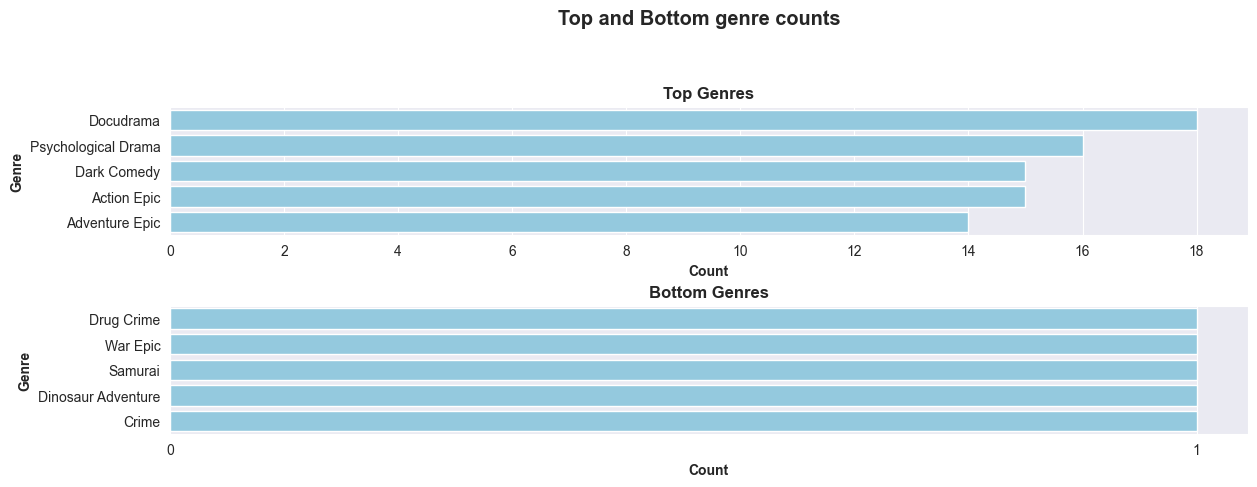

In [13]:
 # Getting the value counts of different genres 
top_genre = IMDB_df['Genre'].value_counts().sort_values( ascending = False ).head(5).reset_index()
top_genre.columns = ['Title', 'Count']
bottom_genre = IMDB_df['Genre'].value_counts().sort_values( ascending = True ).head(5).reset_index()
bottom_genre.columns = ['Title', 'Count']

fig,ax = plt.subplots( 2 , 1 , figsize = ( 12 , 5 ) )
fig.suptitle( 'Top and Bottom genre counts' , fontweight = 'heavy' , size = 'x-large' )
fig.tight_layout( pad = 3.0 )

sns.barplot( ax = ax[0] , data = top_genre , x = 'Count' , y = 'Title' , color = 'skyblue')
sns.barplot( ax = ax[1] , data = bottom_genre , x = 'Count' , y = 'Title' , color = 'skyblue') 

ax[0].set_xlabel( 'Count' , fontweight = 'bold' )
ax[0].set_ylabel( 'Genre' , fontweight = 'bold' )

ax[1].set_xlabel( 'Count' , fontweight = 'bold' )
ax[1].set_ylabel( 'Genre' , fontweight = 'bold' )

ax[0].set_title( 'Top Genres',fontweight = 'bold' )
ax[1].set_title( 'Bottom Genres',fontweight = 'bold' )

ax[0].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax[1].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show


From the output, we can see that the most represented genre in the IMDb dataset is **Docudrama**, with a total of 18 films. On the other hand, the least represented genres, each with only one film, include **Drug Crime, Action, Contemporary Western, Samurai, and Crime**.  

Next, we will analyze how many genres have only one film in the dataset. This will help us understand which genres are less represented

In [14]:
one_genre = IMDB_df['Genre'].value_counts().sort_values( ascending = False ).reset_index()
one_genre.columns = ['Title', 'Count']

x = one_genre['Count'] == 1

print((one_genre[x].shape)[0])

29


From the output, we can see that a total of 29 genres have only one film in the dataset. 

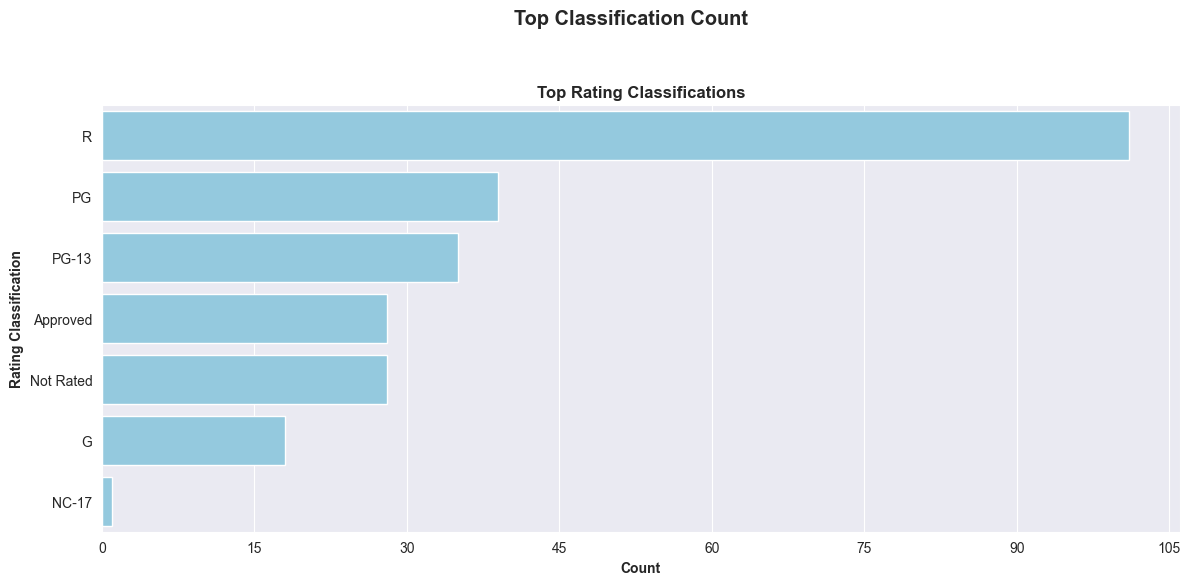

In [15]:
 # Getting the value counts of different Rating Classification
top_Rating_Classification = IMDB_df['Rating_Classification'].value_counts().sort_values( ascending = False ).head(7).reset_index()
top_Rating_Classification.columns = ['Title', 'Count']

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Top Classification Count', fontweight='heavy', size='x-large')
fig.tight_layout(pad=3.0)

sns.barplot(ax=ax, data=top_Rating_Classification, x='Count', y='Title', color='skyblue')

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Rating Classification', fontweight='bold')
ax.set_title('Top Rating Classifications', fontweight='bold')
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()

Most films are rated R, with over 90 entries, indicating that mature content is common among highly rated or critically acclaimed films.

NC-17 rated films are the least represented, likely due to limited distribution or niche audiences

Next,  we will analyze the **longest and shortest films** in the dataset based on runtime.

<function matplotlib.pyplot.show(close=None, block=None)>

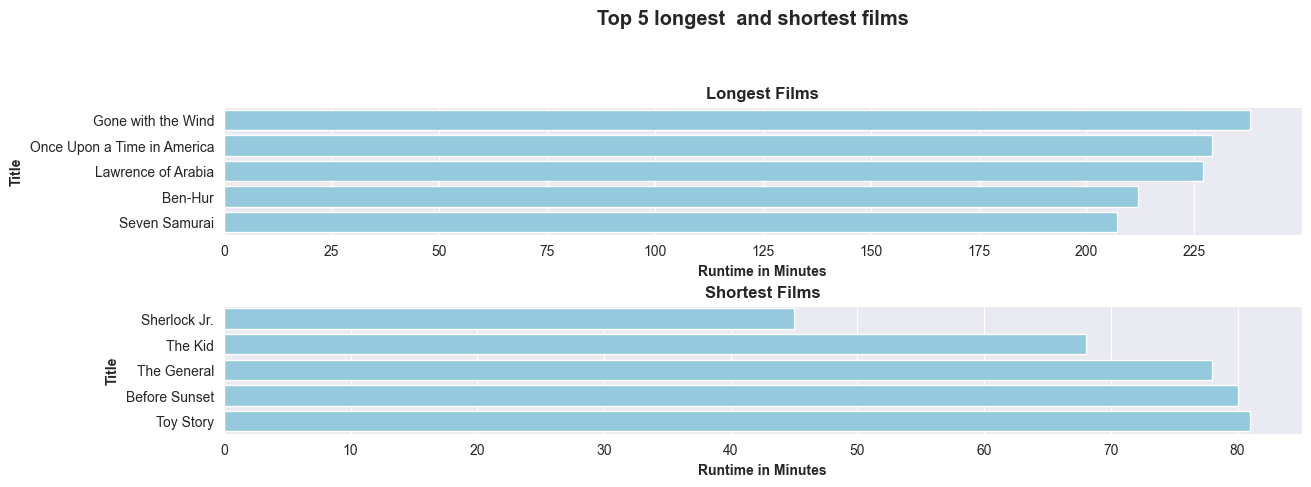

In [16]:
 # Getting the top 5 longest and bottom % shortest  films in imdb 
sorted_longest = IMDB_df.sort_values( by = 'Runtime' , ascending = False ).head(5)
sorted_shortest = IMDB_df.sort_values( by = 'Runtime' , ascending = True ).head(5)

fig,ax = plt.subplots( 2 , 1 , figsize = ( 12 , 5 ) )
fig.suptitle( 'Top 5 longest  and shortest films' , fontweight = 'heavy' , size = 'x-large' )
fig.tight_layout( pad = 3.0 )

sns.barplot( ax = ax[0] , data = sorted_longest , x = 'Runtime' , y = 'Title' , color = 'skyblue')
sns.barplot( ax = ax[1] , data = sorted_shortest , x = 'Runtime' , y = 'Title' , color = 'skyblue') 

ax[0].set_xlabel( 'Runtime in Minutes' , fontweight = 'bold' )
ax[0].set_ylabel( 'Title' , fontweight = 'bold' )

ax[1].set_xlabel( 'Runtime in Minutes' , fontweight = 'bold' )
ax[1].set_ylabel( 'Title' , fontweight = 'bold' )

ax[0].set_title( 'Longest Films',fontweight = 'bold' )
ax[1].set_title( 'Shortest Films',fontweight = 'bold' )

ax[0].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax[1].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show

From the output, we can see that the **longest film** in the dataset is *Gone with the Wind*, with a runtime exceeding 225 minutes, while the **shortest film** is *Sherlock Jr.*, which has a runtime of less than 50 minutes.  

Next, we will analyze the **oldest and most recent films** in the dataset based on their release years.

In [17]:
sorted_oldest = IMDB_df.sort_values( by = 'Year' , ascending = False ).head(5)
sorted_most_rescent = IMDB_df.sort_values( by = 'Year' , ascending = True ).head(5)

display( sorted_oldest[['Title','Year']] )
display(sorted_most_rescent[['Title','Year']])

,Title,Year
51,Dune: Part Two,2024
157,The Wild Robot,2024
199,Maharaja,2024
61,12th Fail,2023
111,Oppenheimer,2023


,Title,Year
135,The Kid,1921
203,Sherlock Jr.,1924
196,The Gold Rush,1925
204,The General,1926
119,Metropolis,1927


From the output, we can see that the **most recent movies** in the dataset were released in **2024**, namely *Dune: Part Two*, *The Wild Robot*, and *Maharaja*. Additionally, some films were released in **2023**, including *12th Fail* and *Oppenheimer*.  

On the other hand, the **oldest film** in the dataset is *The Kid*, released in **1921**, followed by *Sherlock Jr.* (*1924*), *The Gold Rush* (*1925*), *The General* (*1926*), and *Metropolis* (*1927*).  

Next, we will analyze which **year has the most films** in the dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

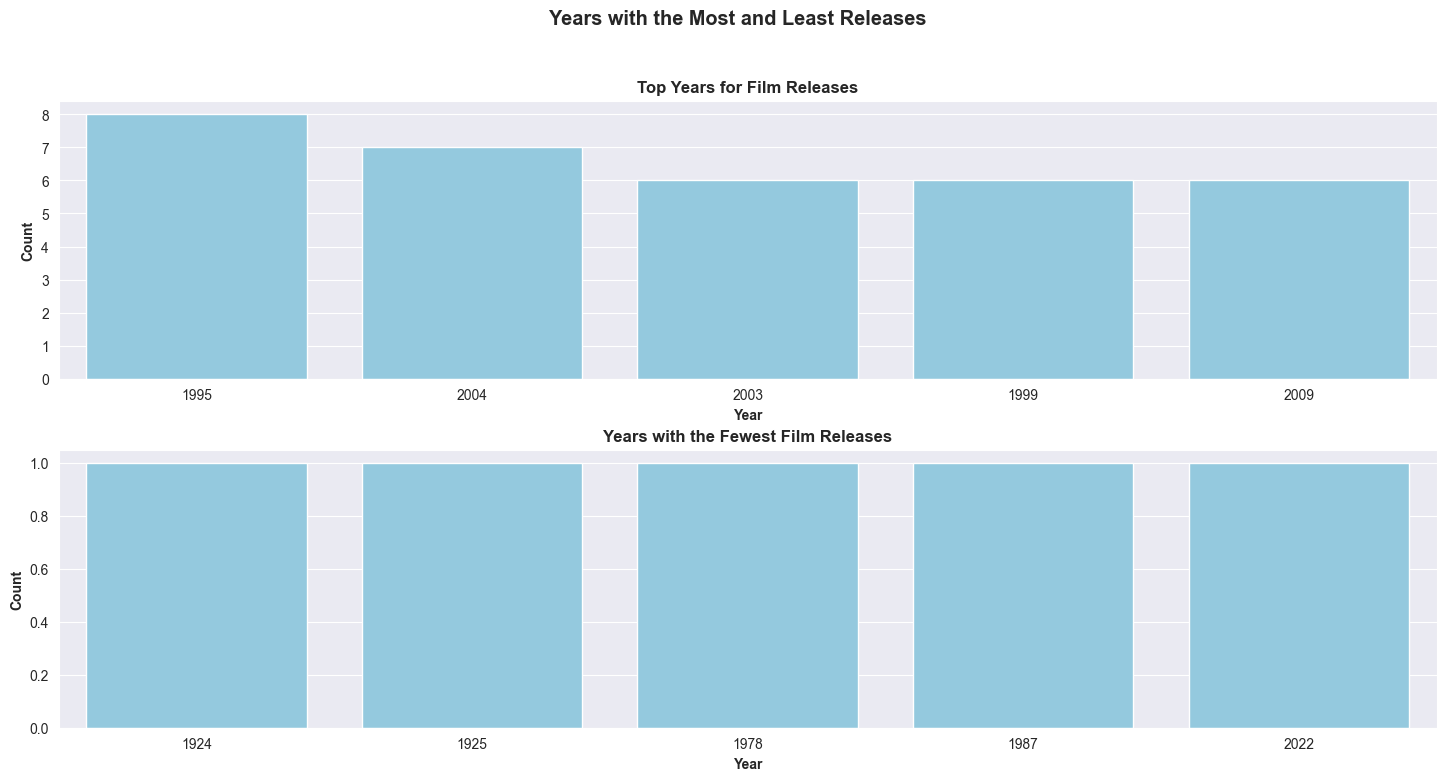

In [18]:
 # Getting the value counts
top_5_year = IMDB_df['Year'].value_counts().sort_values( ascending = False ).to_frame().reset_index( drop = False ).head(5)
bottom_5_year = IMDB_df['Year'].value_counts().sort_values( ascending = True ).to_frame().reset_index( drop = False ).head(5)
top_5_year.columns = ['Year', 'Count']
bottom_5_year.columns = ['Year', 'Count']

fig,ax = plt.subplots( 2 , 1 , figsize = ( 15 , 8 ) )
fig.suptitle( 'Years with the Most and Least Releases' , fontweight = 'heavy' , size = 'x-large' )
fig.tight_layout( pad = 3.0 )

sns.barplot( ax = ax[0] , data = top_5_year , x = 'Year' , y = 'Count' , color = 'skyblue', order = top_5_year.sort_values('Count', ascending=False)['Year'])
sns.barplot( ax = ax[1] , data = bottom_5_year , x = 'Year' , y = 'Count' , color = 'skyblue') 

ax[0].set_xlabel( 'Year' , fontweight = 'bold' )
ax[0].set_ylabel( 'Count' , fontweight = 'bold' )

ax[1].set_xlabel( 'Year' , fontweight = 'bold' )
ax[1].set_ylabel( 'Count' , fontweight = 'bold' )

ax[0].set_title( 'Top Years for Film Releases',fontweight = 'bold' )
ax[1].set_title( 'Years with the Fewest Film Releases',fontweight = 'bold' )

ax[0].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax[1].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show

From the output, we can see that the **year with the most films** in the dataset is **1995**, with a total of **8 films**, followed by **2004** with **7 films**, and **2003** with **6 films**. Additionally, **1999 and 2009** each have **6 films** as well.  

On the other hand, several years have only **one film** in the dataset. Next, we will analyze how many years fall into this category.

In [19]:
 # setting the parameters 
one_yr_film = IMDB_df['Year'].value_counts().sort_values( ascending = False ).to_frame().reset_index( drop = False )
one_yr_film.columns = ['Year', 'Count']

x = one_yr_film['Count'] == 1

print((one_yr_film[x].shape)[0])

21


From the output, we can see that a total of 21 years have only one film in the dataset. This suggests that while certain years had a significant number of highly-rated films, others had only a single standout movie.

Now, we will proceed with analyzing the data from 
**ROTTEN TOMATOES**.

In [20]:
 # Getting the number of rows and collumns
print(Rotten_Tomatoes_df.shape)

(300, 10)


From the output, we can see that the **Rotten Tomatoes** dataset contains **300 rows and 10 columns**.  

Next, we will generate a summary description of the dataset to examine key statistics, including numerical distributions and potential missing values.

In [21]:
 # Checking the data
display( Rotten_Tomatoes_df.describe() )

display( Rotten_Tomatoes_df.describe( include = ['object', 'category'] ) )

,Year,Total_Ratings,Critic_Score,Audience_Score,Runtime
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1981.710000,84119.500000,96.523333,91.046667,117.693333
std,29.122723,95145.896391,2.349722,3.706339,27.234752
min,1921.000000,100.000000,89.000000,78.000000,60.000000
25%,1957.000000,10000.000000,95.000000,89.000000,97.750000
50%,1985.000000,50000.000000,97.000000,92.000000,113.000000
75%,2009.000000,100000.000000,98.000000,94.000000,131.000000
max,2024.000000,250000.000000,100.000000,99.000000,250.000000


,Title,Link,Rating_Classification,Genre,Director
count,300,300,300,300,300
unique,299,300,6,18,208
top,Beauty and the Beast,https://www.rottentomatoes.com/m/the_cabinet_o...,Not Rated,Drama,Alfred Hitchcock
freq,2,1,92,57,7


From the output, we can make the following observations:  

1. **Unique Movie Titles** – There are **299 unique** movie titles, but *Beauty and the Beast* appears twice.  
2. **Genres** – A total of **18 unique genres** exist, with **Drama** being the most common, appearing in **57 films**.  
3. **Directors** – There are **208 unique directors**, and **Alfred Hitchcock** has the most films, with **7 entries** in the dataset.  

#### **Numerical Insights**  
1. **Release Year** – The oldest film in the dataset was released in **1921**, while the most recent film was released in **2024**.  
2. **Total Ratings** – The average number of ratings is **84,119.5**, with a minimum of **100** and a maximum of **250,000**.  
3. **Runtime** – The average runtime is **117.69 minutes**, with the shortest film at **60 minutes** and the longest at **250 minutes**.  
4. **Critic Scores** – The mean critic score is **96.52/100**, with scores ranging from **89 to 100**.  
5. **Audience Scores** – The mean audience score is **91.05/100**, with scores ranging from **89 to 99**.  

We will now proceed to:  
- Analyze the **distribution** of numerical columns.  
- Check for **correlations** between variables.

<Figure size 2000x1000 with 0 Axes>

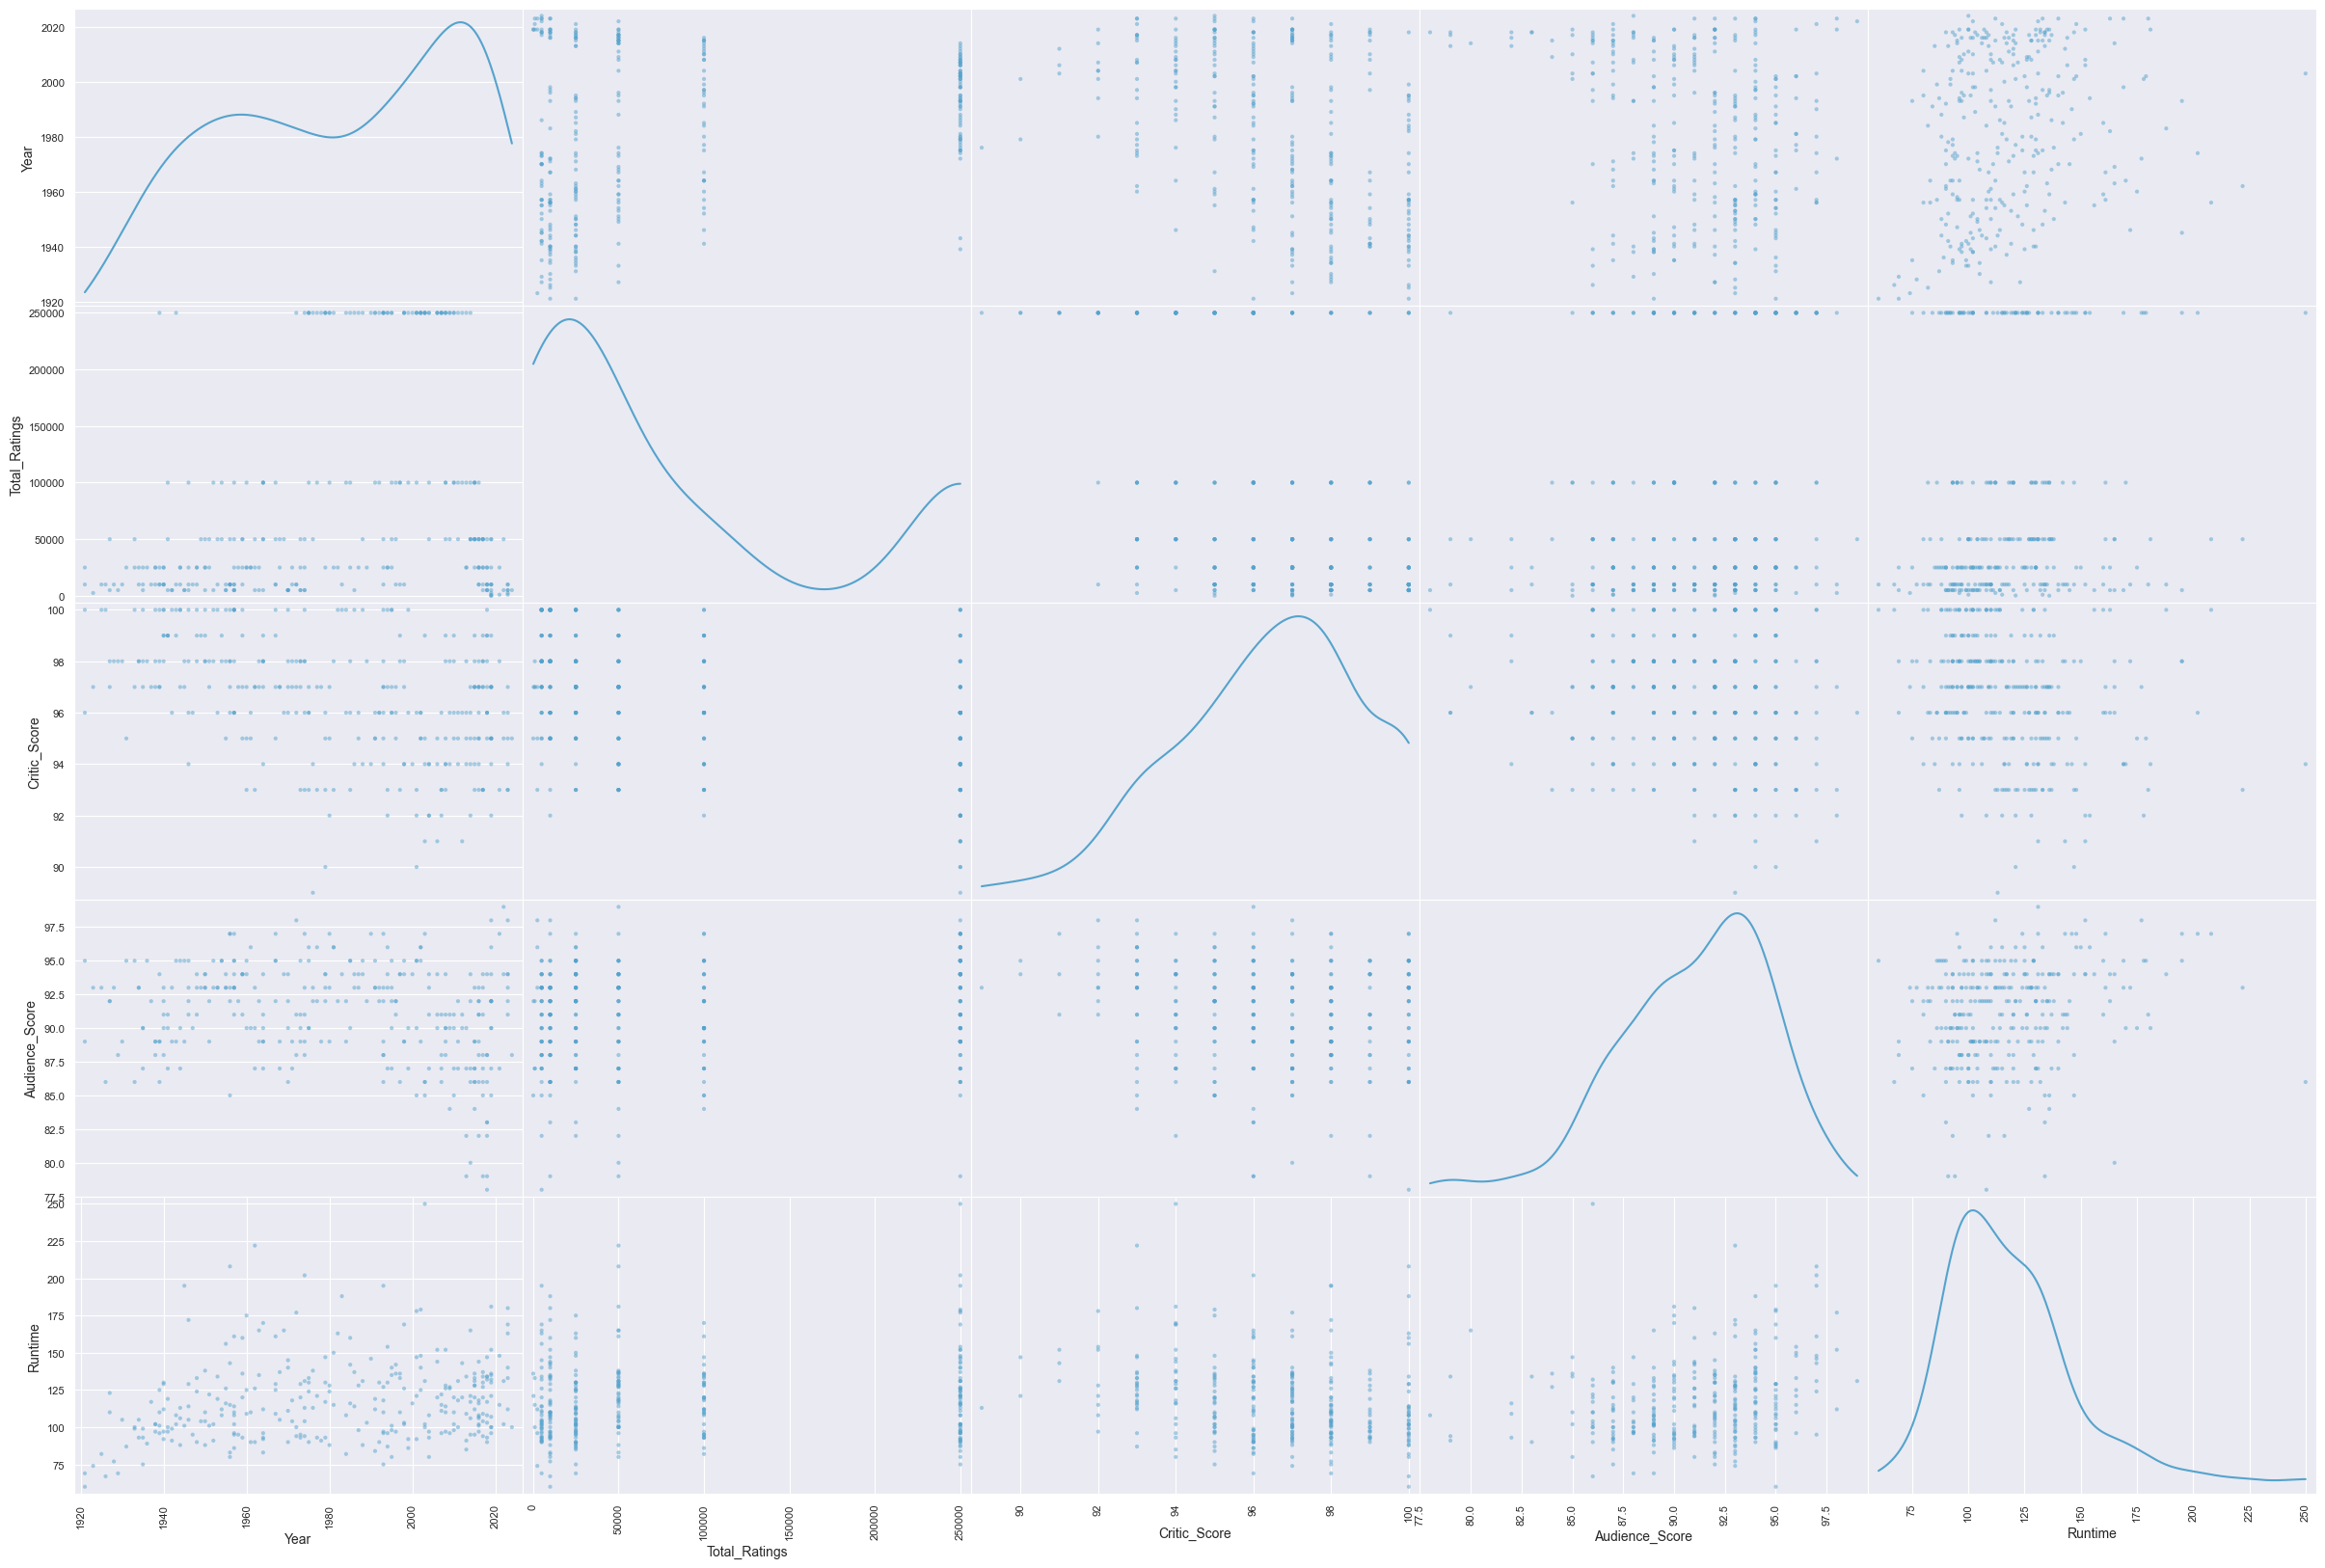

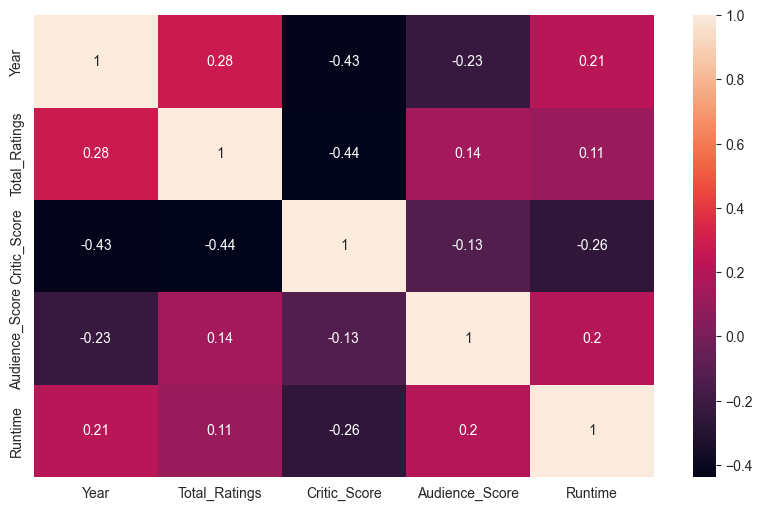

In [22]:
 # Getting the Numerical data
rotten_nums = Rotten_Tomatoes_df.select_dtypes( include = ['float64','int64'])

 # plotting Scatter Matrix
plt.figure( figsize = (20,10) )
pd.plotting.scatter_matrix( rotten_nums , figsize = ( 30 , 20 ) , diagonal = 'kde' )

 # Correlation
corr = rotten_nums.corr()

 # ploting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap( corr ,annot = True )


plt.show()

From the graphs, we can observe the following insights:  

### **Key Observations**  
1. **No Strong Linear Relationship** – There is no clear **positive linear relationship** between the numerical variables.  
2. **Distribution Analysis**  
   - **Critic Score & Audience Score** – Both are **left-skewed**, indicating that most films have **high scores**, with a few outliers on the lower end.  
   - **Runtime** – It is **right-skewed**, meaning most films have shorter runtimes, but a few are significantly longer.  
   - **Year & Total Ratings** – Both exhibit an **M-shaped distribution**, suggesting **two peaks**, which might indicate two distinct eras of highly rated films.  
3. **Correlation Analysis** – The **correlation matrix** confirms that there is **no strong correlation** between any of the numerical columns.  

<function matplotlib.pyplot.show(close=None, block=None)>

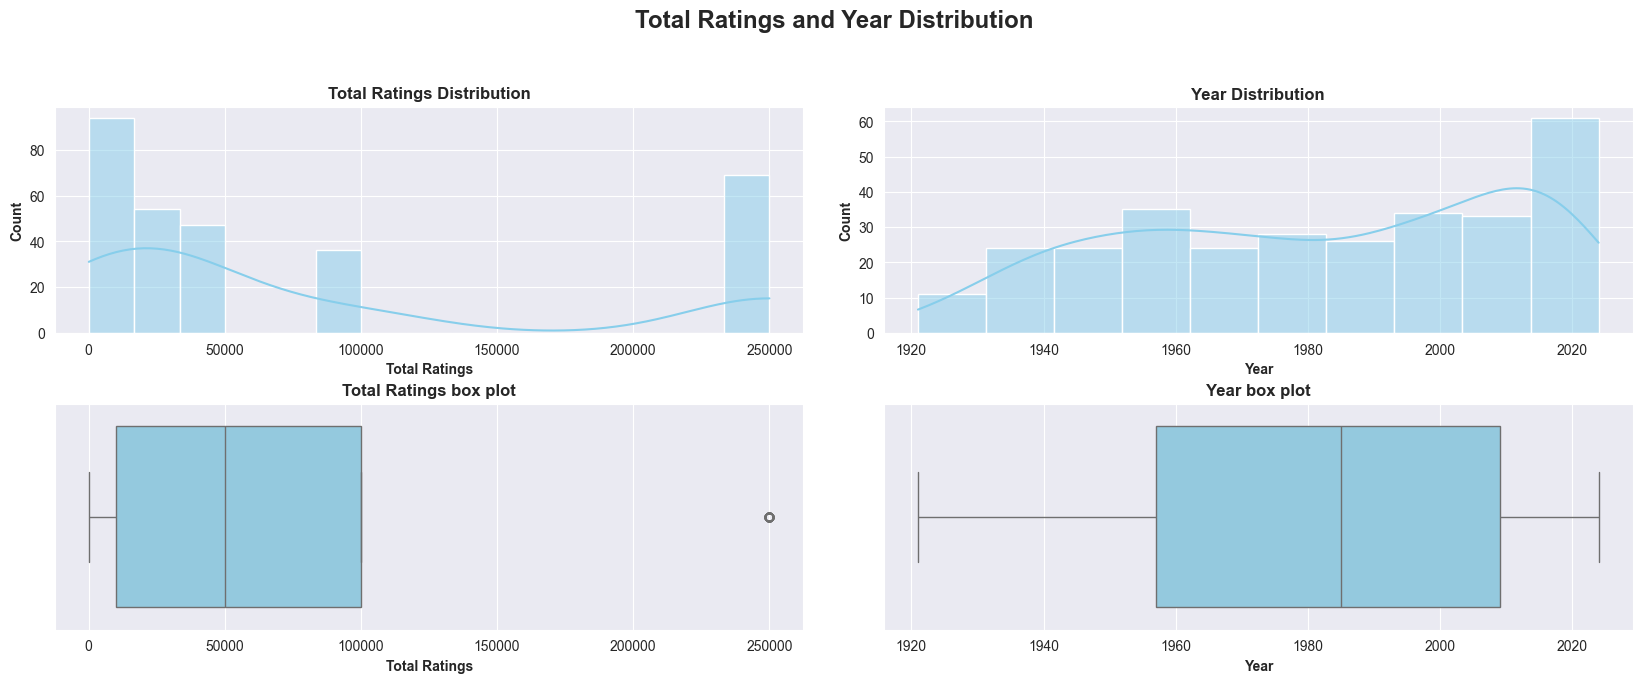

In [23]:
 # Plotting histograms
fig,ax = plt.subplots( 2 , 2 , figsize = (17 ,7) )
 # Heading of the whole plot 
fig.suptitle( 'Total Ratings and Year Distribution' , fontweight = 'heavy' , size = 'xx-large' )
fig.tight_layout( pad = 3.0 )

sns.histplot( ax = ax[0,0] , data = Rotten_Tomatoes_df , x = 'Total_Ratings' , bins = 15 , kde = True , color = 'skyblue' )
sns.histplot( ax = ax[0,1] , data = Rotten_Tomatoes_df , x = 'Year' , bins = 10 , kde = True , color = 'skyblue' )
sns.boxplot( ax=ax[1,0], data=Rotten_Tomatoes_df, x='Total_Ratings', color='skyblue')
sns.boxplot( ax=ax[1,1], data=Rotten_Tomatoes_df, x='Year', color='skyblue')

ax[0,0].set_xlabel( 'Total Ratings' , fontweight = 'bold' )
ax[0,1].set_xlabel( 'Year' , fontweight = 'bold' )
ax[1,0].set_xlabel( 'Total Ratings' , fontweight = 'bold' )
ax[1,1].set_xlabel( 'Year' , fontweight = 'bold' )

ax[0,0].set_ylabel( 'Count' , fontweight = 'bold' )
ax[0,1].set_ylabel( 'Count' , fontweight = 'bold' )

ax[0,0].set_title( 'Total Ratings Distribution',fontweight = 'bold' )
ax[0,1].set_title( 'Year Distribution',fontweight = 'bold' )
ax[1,0].set_title( 'Total Ratings box plot',fontweight = 'bold' )
ax[1,1].set_title( 'Year box plot',fontweight = 'bold' )

plt.show

From the graphs, we can observe the following insights:  
 
1. **Total Ratings Distribution**  
   - The **histogram** indicates that **most movies have low total ratings**.  
   - The **KDE curve** reveals a **bimodal distribution**, with two peaks—one in the **lower total ratings** and another in the **higher total ratings** range.  
   - This suggests that some films have significantly higher audience engagement than others.  

2. **Outlier in Total Ratings**  
   - The **box plot** highlights **one clear outlier**, meaning **one film received far more total ratings** than the rest.  
   - Identifying this movie will help understand why it stands out.  

3. **Year Distribution**  
   - The number of films released has shown a **gradual increase over the years**, indicating a growing number of critically acclaimed movies.  
   - The peak occurred in **2020**, with **over 60 films** released that year.  

4. **Boxplot for Year**  
   - There are **no clear outliers** in the number of films released per year.  

<function matplotlib.pyplot.show(close=None, block=None)>

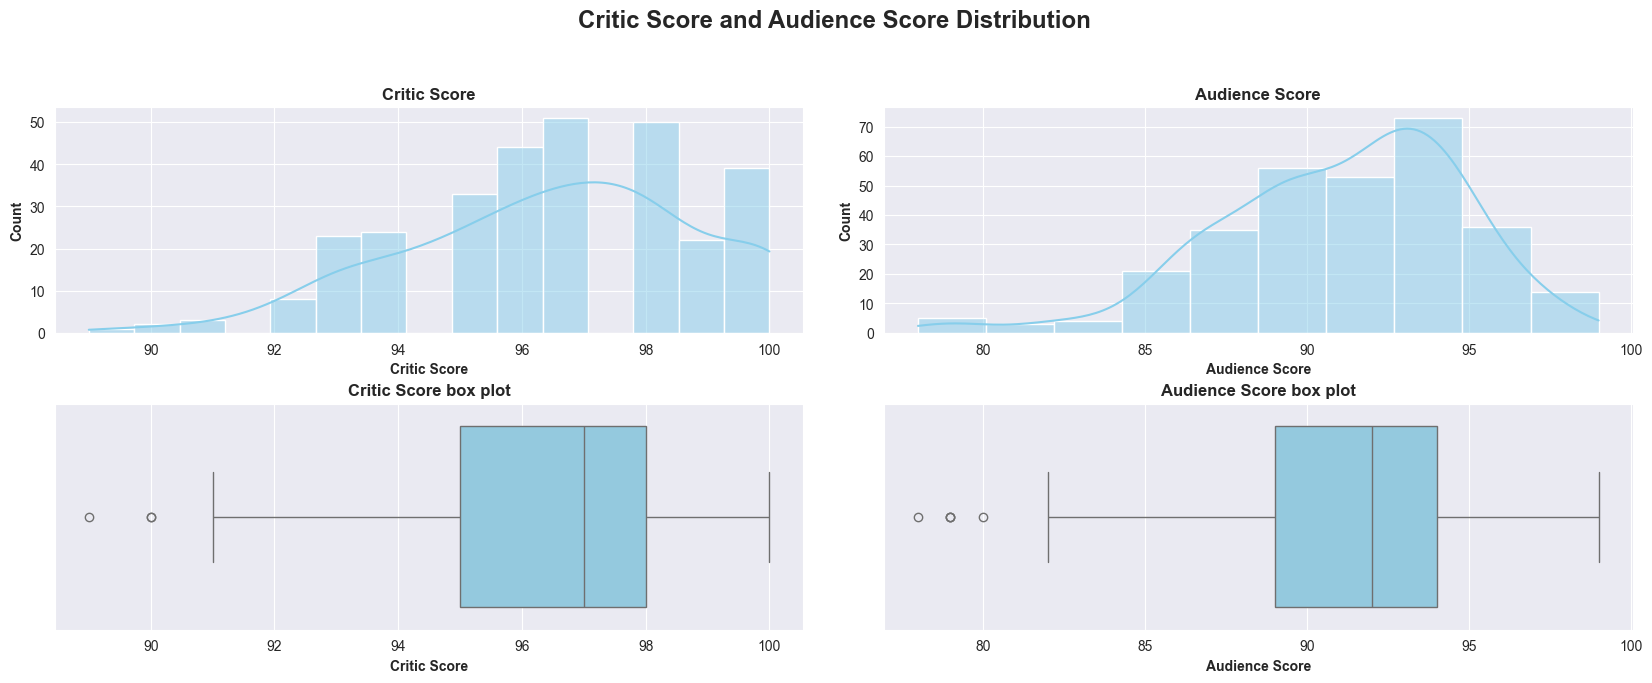

In [24]:
 # Plotting histograms
fig,ax = plt.subplots( 2 , 2 , figsize = (17 ,7) )
 # Heading of the whole plot 
fig.suptitle( 'Critic Score and Audience Score Distribution' , fontweight = 'heavy' , size = 'xx-large' )
fig.tight_layout( pad = 3.0 )

sns.histplot( ax = ax[0,0] , data = Rotten_Tomatoes_df , x = 'Critic_Score' , bins = 15 , kde = True , color = 'skyblue' )
sns.histplot( ax = ax[0,1] , data = Rotten_Tomatoes_df , x = 'Audience_Score' , bins = 10 , kde = True , color = 'skyblue' )
sns.boxplot( ax=ax[1,0], data=Rotten_Tomatoes_df, x='Critic_Score', color='skyblue')
sns.boxplot( ax=ax[1,1], data=Rotten_Tomatoes_df, x='Audience_Score', color='skyblue')

ax[0,0].set_xlabel( 'Critic Score' , fontweight = 'bold' )
ax[0,1].set_xlabel( 'Audience Score' , fontweight = 'bold' )
ax[1,0].set_xlabel( 'Critic Score' , fontweight = 'bold' )
ax[1,1].set_xlabel( 'Audience Score' , fontweight = 'bold' )

ax[0,0].set_ylabel( 'Count' , fontweight = 'bold' )
ax[0,1].set_ylabel( 'Count' , fontweight = 'bold' )

ax[0,0].set_title( 'Critic Score',fontweight = 'bold' )
ax[0,1].set_title( 'Audience Score',fontweight = 'bold' )
ax[1,0].set_title( 'Critic Score box plot',fontweight = 'bold' )
ax[1,1].set_title( 'Audience Score box plot',fontweight = 'bold' )

plt.show

From the graphs, we can observe the following insights:  

1. **Critic Score Distribution**  
   - The **histogram** shows that the **critic score distribution is left-skewed**, meaning most films have high critic scores with fewer movies having lower ratings.  

2. **Outliers in Critic and Audience Scores**  
   - The **box plots for both critic score and audience score reveal the presence of outliers**, indicating that some films received significantly lower or higher ratings compared to the majority.  

3. **Audience Score Distribution**  
   - The **histogram for audience score** is also **left-skewed**, showing that most films have high audience ratings, with fewer films receiving lower ratings.  

<function matplotlib.pyplot.show(close=None, block=None)>

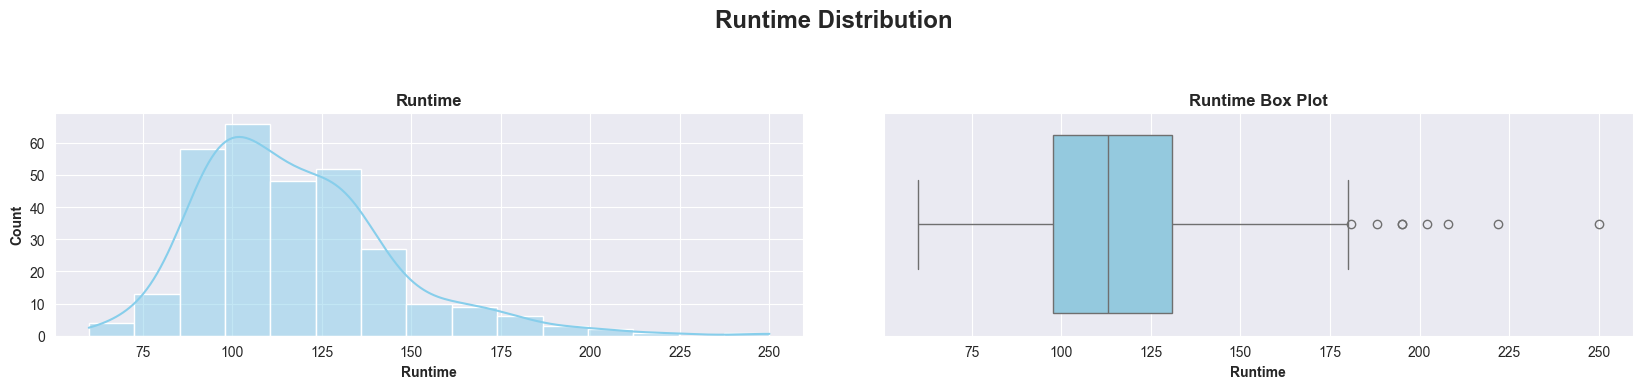

In [25]:
 # Plotting histograms
fig,ax = plt.subplots( 1 , 2 , figsize = (17 ,4) )
 # Heading of the whole plot 
fig.suptitle( 'Runtime Distribution' , fontweight = 'heavy' , size = 'xx-large' )
fig.tight_layout( pad = 3.0 )

sns.histplot( ax = ax[0] , data = Rotten_Tomatoes_df , x = 'Runtime' , bins = 15 , kde = True , color = 'skyblue' )
sns.boxplot( ax=ax[1], data=Rotten_Tomatoes_df, x='Runtime', color='skyblue')


ax[0].set_xlabel( 'Runtime' , fontweight = 'bold' )
ax[1].set_xlabel( 'Runtime' , fontweight = 'bold' )


ax[0].set_ylabel( 'Count' , fontweight = 'bold' )

ax[0].set_title( 'Runtime',fontweight = 'bold' )
ax[1].set_title( 'Runtime Box Plot',fontweight = 'bold' )

plt.show

From the graphs, we can conclude:  

1. **Runtime Distribution**  
   - The **histogram** confirms that **runtime is right-skewed**, meaning most films have shorter runtimes, with fewer films having significantly longer durations.  

2. **Outliers in Runtime**  
   - The **box plot** highlights **outliers above 175 minutes**, indicating that some films have exceptionally long runtimes compared to the rest.  

We will now proceed to analyze:  
- The **highest-rated and lowest-rated movies** based on critic and audience scores.  
- The **longest and shortest films** in the dataset.

In [26]:
 # Top 5 highest rated films
top_5_crit_rated = Rotten_Tomatoes_df.sort_values( by = 'Critic_Score' , ascending = False ).head(5)
display(top_5_crit_rated[['Title','Genre','Audience_Score','Critic_Score']])

 # Lowest rated films
bottom_5_crit_rated = Rotten_Tomatoes_df.sort_values( by = 'Critic_Score' , ascending = True ).head(5)
display(bottom_5_crit_rated[['Title','Genre','Audience_Score','Critic_Score']])

 # Top 5 highest rated films
top_5_aud_rated = Rotten_Tomatoes_df.sort_values( by = 'Audience_Score' , ascending = False ).head(5)
display(top_5_aud_rated[['Title','Genre','Audience_Score','Critic_Score']])

 # Lowest rated films
bottom_5_aud_rated = Rotten_Tomatoes_df.sort_values( by = 'Audience_Score' , ascending = True ).head(5)
display(bottom_5_aud_rated[['Title','Genre','Audience_Score','Critic_Score']])

,Title,Genre,Audience_Score,Critic_Score
29,Three Colors: Red,Drama,94,100
24,12 Angry Men,Drama,97,100
23,Singin' in the Rain,Musical,95,100
21,The Philadelphia Story,Romance,93,100
185,The Grapes of Wrath,Drama,88,100


,Title,Genre,Audience_Score,Critic_Score
283,Taxi Driver,Drama,93,89
69,Apocalypse Now,War,94,90
279,Amélie,Romance,95,90
261,City of God,Crime,97,91
229,The Departed,Crime,94,91


,Title,Genre,Audience_Score,Critic_Score
6,Top Gun: Maverick,Action,99,96
201,Ford v Ferrari,History,98,92
207,Air,Drama,98,93
1,The Godfather,Crime,98,97
3,Seven Samurai,Action,97,100


,Title,Genre,Audience_Score,Critic_Score
137,Leave No Trace,Drama,78,100
238,Gravity,Drama,79,96
224,Black Panther,Action,79,96
111,Lady Bird,Comedy,79,99
184,Boyhood,Drama,80,97


From the output, we can derive the following insights:
1. **Top Critically Rated Films**  
   - The **top 5 films** all have a **perfect critic score of 100**.  
   - The **highest audience-rated film** is *Top Gun: Maverick* with an **audience score of 99**, but its critic score is **96**.  

2. **Lowest Rated Films**  
   - The **lowest critically rated film** is *Taxi Driver*, with a **critic score of 89**, but it still maintains a **high audience score of 93**.  
   - The **lowest audience-rated film** is *Leave No Trace*, with an **audience score of 78**, but it holds a **perfect critic score of 100**.  

<function matplotlib.pyplot.show(close=None, block=None)>

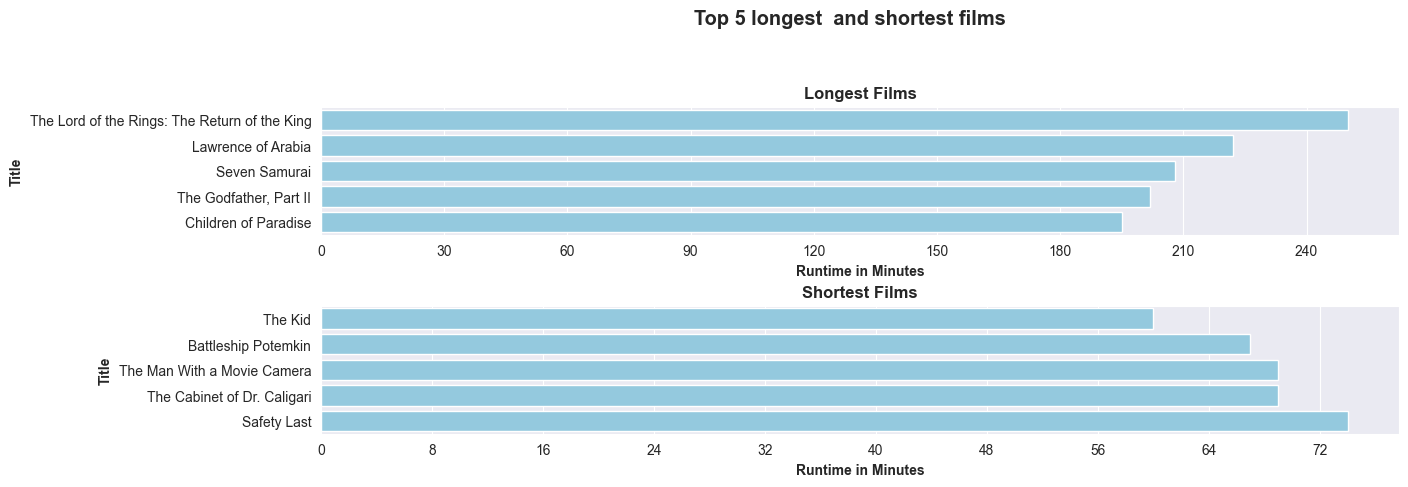

In [27]:
 # Top 5 longest films
long_films = Rotten_Tomatoes_df.sort_values( by = 'Runtime' , ascending = False ).head(5)

 # top 5 shortest films 
short_films = Rotten_Tomatoes_df.sort_values( by = 'Runtime' , ascending = True ).head(5)

 # Plotting barplots
fig,ax = plt.subplots( 2 , 1 , figsize = ( 12 , 5 ) )
fig.suptitle( 'Top 5 longest  and shortest films' , fontweight = 'heavy' , size = 'x-large' )
fig.tight_layout( pad = 3.0 )

sns.barplot( ax = ax[0] , data = long_films , x = 'Runtime' , y = 'Title' , color = 'skyblue')
sns.barplot( ax = ax[1] , data = short_films , x = 'Runtime' , y = 'Title' , color = 'skyblue') 

ax[0].set_xlabel( 'Runtime in Minutes' , fontweight = 'bold' )
ax[0].set_ylabel( 'Title' , fontweight = 'bold' )

ax[1].set_xlabel( 'Runtime in Minutes' , fontweight = 'bold' )
ax[1].set_ylabel( 'Title' , fontweight = 'bold' )

ax[0].set_title( 'Longest Films',fontweight = 'bold' )
ax[1].set_title( 'Shortest Films',fontweight = 'bold' )

ax[0].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax[1].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show

From the graph, we can observe the following:  

1. **Longest Film**:  
   - *The Lord of the Rings: The Return of the King* is the **longest film**, with a runtime of **over 240 minutes**.  

2. **Shortest Film**:  
   - *The Kid* is the **shortest film**, with a runtime of **less than 64 minutes**.  

### **Next Steps**  
We will now analyze:  
- The **most and least reviewed films** based on total ratings.  
- The **distribution of genres** to identify the most and least frequent genres.

In [28]:
 # Top 5 films with the highest number of ratings 
top_5_tot_rat =  Rotten_Tomatoes_df.sort_values( by = 'Total_Ratings' , ascending = False ).head(5)
display(top_5_tot_rat[['Title','Genre','Total_Ratings']])

 # Lowest rated films
bottom_5_tot_rat = Rotten_Tomatoes_df.sort_values( by = 'Total_Ratings' , ascending = True ).head(5)
display(bottom_5_tot_rat[['Title','Genre','Total_Ratings']])

,Title,Genre,Total_Ratings
2,Casablanca,Drama,250000
1,The Godfather,Crime,250000
261,City of God,Crime,250000
264,Aladdin,Kids & Family,250000
28,"The Godfather, Part II",Crime,250000


,Title,Genre,Total_Ratings
191,Marriage Story,Drama,100
67,Portrait of a Lady on Fire,History,250
66,Minari,Drama,1000
35,The Holdovers,Holiday,1000
132,The Farewell,Comedy,1000


From the output, we can observe the following:  

1. **Most Reviewed Films**:  
   - The films with the highest total ratings (**250,000 total ratings**) are:  
     - *Casablanca*  
     - *The Godfather*  
     - *City of God*  
     - *Aladdin*  
     - *The Godfather: Part II*  

2. **Least Reviewed Film**:  
   - *Marriage Story* has the **lowest total rating**, with only **100 total ratings**.  

<function matplotlib.pyplot.show(close=None, block=None)>

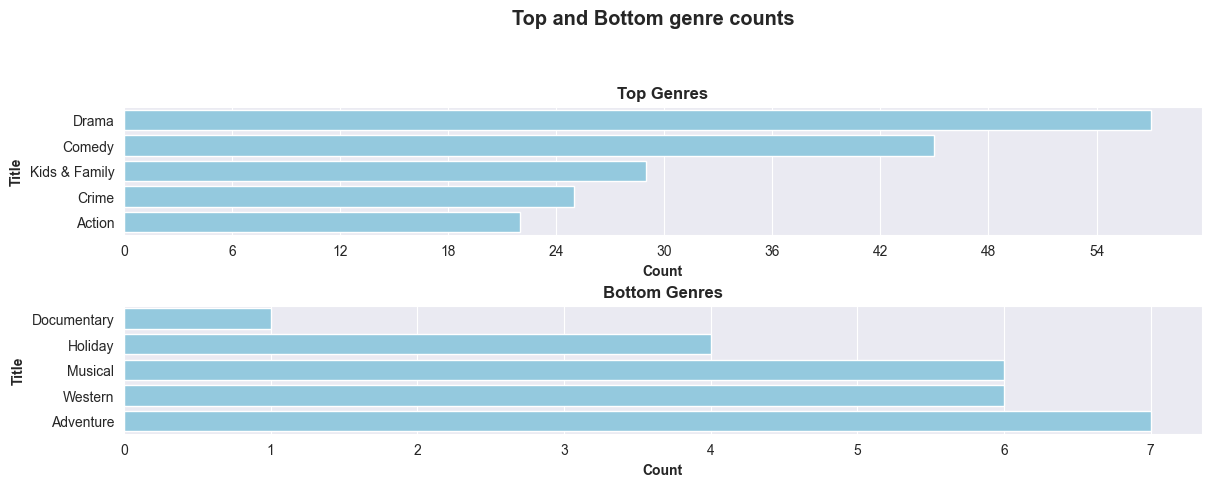

In [29]:
 # Getting the value counts of different genres 
top_genre = Rotten_Tomatoes_df['Genre'].value_counts().sort_values( ascending = False ).head(5).reset_index()
top_genre.columns = ['Title', 'Count']
bottom_genre = Rotten_Tomatoes_df['Genre'].value_counts().sort_values( ascending = True ).head(5).reset_index()
bottom_genre.columns = ['Title', 'Count']

fig,ax = plt.subplots( 2 , 1 , figsize = ( 12 , 5 ) )
fig.suptitle( 'Top and Bottom genre counts' , fontweight = 'heavy' , size = 'x-large' )
fig.tight_layout( pad = 3.0 )

sns.barplot( ax = ax[0] , data = top_genre , x = 'Count' , y = 'Title' , color = 'skyblue')
sns.barplot( ax = ax[1] , data = bottom_genre , x = 'Count' , y = 'Title' , color = 'skyblue') 

ax[0].set_xlabel( 'Count' , fontweight = 'bold' )
ax[0].set_ylabel( 'Title' , fontweight = 'bold' )

ax[1].set_xlabel( 'Count' , fontweight = 'bold' )
ax[1].set_ylabel( 'Title' , fontweight = 'bold' )

ax[0].set_title( 'Top Genres',fontweight = 'bold' )
ax[1].set_title( 'Bottom Genres',fontweight = 'bold' )

ax[0].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax[1].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show

From the output, we can observe the following:  

1. **Most Common Genre**:  
   - *Drama* is the most prevalent genre, with **over 54 films** in the dataset.  

2. **Least Common Genre**:  
   - *Documentary* is the least represented genre, with **only one film** in the dataset.  


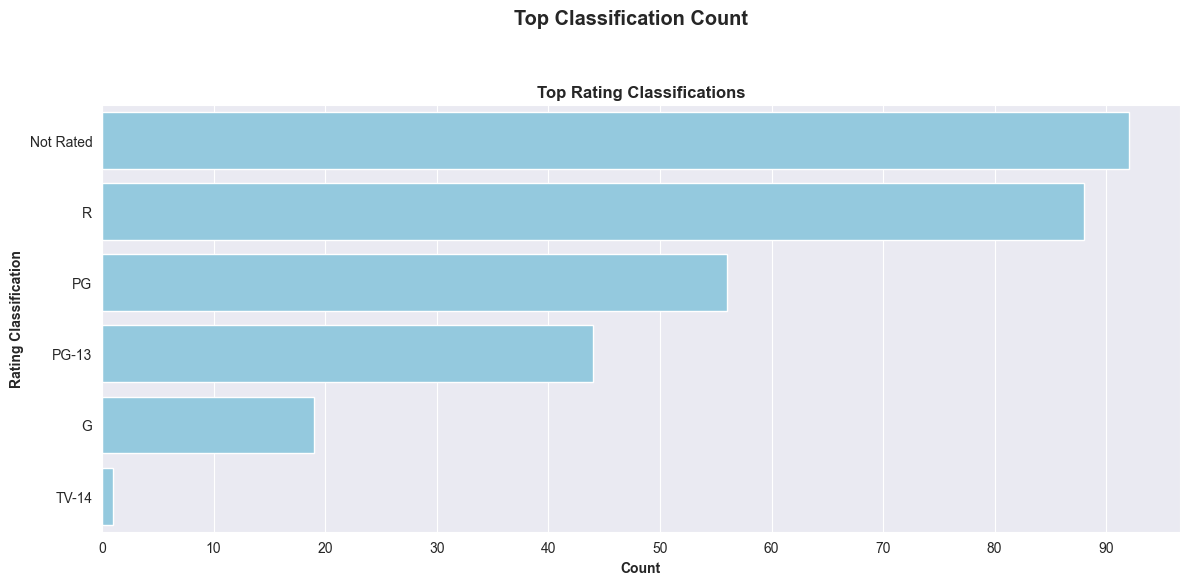

In [30]:
 # Getting the value counts of different Rating Classification
top_Rating_Classification = Rotten_Tomatoes_df['Rating_Classification'].value_counts().sort_values( ascending = False ).head(7).reset_index()
top_Rating_Classification.columns = ['Title', 'Count']

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Top Classification Count', fontweight='heavy', size='x-large')
fig.tight_layout(pad=3.0)

sns.barplot(ax=ax, data=top_Rating_Classification, x='Count', y='Title', color='skyblue')

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Rating Classification', fontweight='bold')
ax.set_title('Top Rating Classifications', fontweight='bold')
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))


From the output, we can see that the most common rating classification is "Not Rated" with over 90 films, suggesting a strong presence of mature-themed content in top-rated movies.
On the other hand, the least common rating classification is "TV-14", indicating that television content suitable for younger audiences is less represented in this dataset

### **Next Steps**  
We will now analyze:  
- The **directors with the most films** in the dataset.  
- The **directors with the least films** to identify unique entries.

In [31]:
top_dir = Rotten_Tomatoes_df['Director'].value_counts().sort_values( ascending = False ).to_frame().reset_index( drop = False ).head(5)
bottom_dir = Rotten_Tomatoes_df['Director'].value_counts().sort_values( ascending = True ).to_frame().reset_index( drop = False ).head(5)

display(top_dir)
display(bottom_dir)

,Director,count
0,Alfred Hitchcock,7
1,Akira Kurosawa,6
2,Billy Wilder,6
3,Steven Spielberg,5
4,Charlie Chaplin,4


,Director,count
0,Jordan Peele,1
1,Ridley Scott,1
2,Robert Hamer,1
3,Isao Takahata,1
4,Tom McCarthy,1


From the output, we can see that:  

1. **Director with the Most Films**:  
   - *Alfred Hitchcock* has the highest number of films, with **7 entries** in the dataset.  

2. **Directors with the Least Films**:  
   - Many directors have **only one film** in the dataset.  

### **Next Steps**  
We will now check the exact number of directors who have **only one entry** in the dataset.

In [32]:
dir_counts = Rotten_Tomatoes_df['Director'].value_counts().sort_values( ascending = False ).to_frame().reset_index( drop = False )

x = dir_counts['count'] == 1

print(((dir_counts[x]).shape)[0])

155


From the output, we observe that:  

1. **Directors with Only One Film**:  
   - A total of **155 directors** have only one film in the dataset.  

2. **Oldest & Most Recent Films**:  
   - The **oldest film** was released in **1921**.  
   - The **most recent films** were released in **2024**.  

### **Next Steps**  
We will now analyze the number of film releases per year to determine:  
- The **years with the highest number of film releases**.  
- The **years with the lowest number of film releases**.

<function matplotlib.pyplot.show(close=None, block=None)>

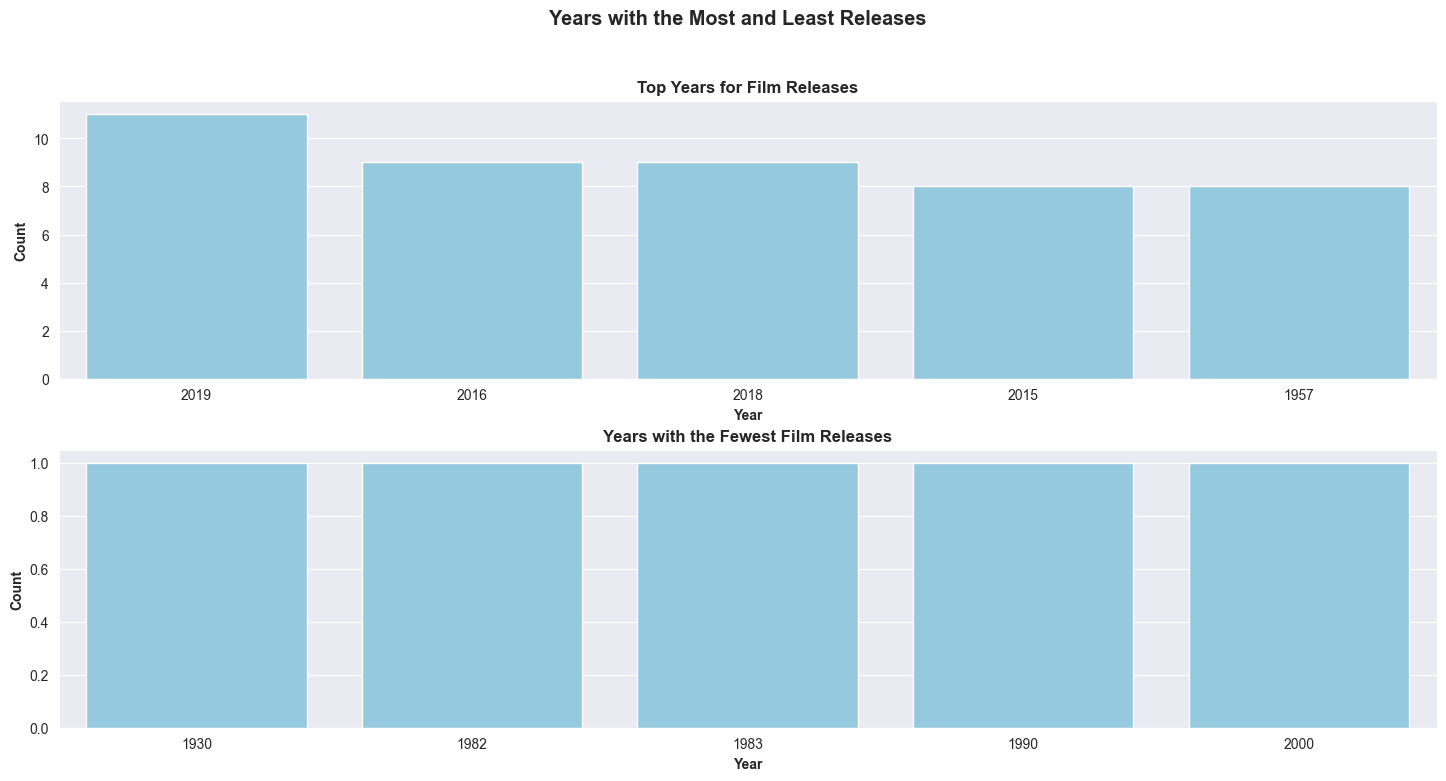

In [33]:
 # Getting the value counts
top_5_year = Rotten_Tomatoes_df['Year'].value_counts().sort_values( ascending = False ).to_frame().reset_index( drop = False ).head(5)
bottom_5_year = Rotten_Tomatoes_df['Year'].value_counts().sort_values( ascending = True ).to_frame().reset_index( drop = False ).head(5)
top_5_year.columns = ['Year', 'Count']
bottom_5_year.columns = ['Year', 'Count']

fig,ax = plt.subplots( 2 , 1 , figsize = ( 15 , 8 ) )
fig.suptitle( 'Years with the Most and Least Releases' , fontweight = 'heavy' , size = 'x-large' )
fig.tight_layout( pad = 3.0 )

sns.barplot( ax = ax[0] , data = top_5_year , x = 'Year' , y = 'Count' , color = 'skyblue', order = top_5_year.sort_values('Count', ascending=False)['Year'])
sns.barplot( ax = ax[1] , data = bottom_5_year , x = 'Year' , y = 'Count' , color = 'skyblue') 

ax[0].set_xlabel( 'Year' , fontweight = 'bold' )
ax[0].set_ylabel( 'Count' , fontweight = 'bold' )

ax[1].set_xlabel( 'Year' , fontweight = 'bold' )
ax[1].set_ylabel( 'Count' , fontweight = 'bold' )

ax[0].set_title( 'Top Years for Film Releases',fontweight = 'bold' )
ax[1].set_title( 'Years with the Fewest Film Releases',fontweight = 'bold' )

ax[0].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax[1].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show

From the graph, we conclude that:  
1. **2019 had the highest number of film releases**, with **over 10 films** in the dataset.  
2. **The bottom 5 years had the least releases**, with **only one film each**.  

**ANALYSIS SUMMARY:**

Following the comprehensive exploratory data analysis of the IMDb, Letterboxd, and Rotten Tomatoes datasets, we observed the following key insights:

1. **Total Ratings:**
   - **IMDb** recorded the highest number of total ratings with a maximum of 3,000,000 and an average of 716,420.
   - **Rotten Tomatoes** had the lowest maximum total ratings at 250,000, with an average of 84,119.5.

2. **Film Ratings:**
   - The highest-rated film on **IMDb** has a rating of 9.3, with an average rating across all films of 8.30.
   - On **Rotten Tomatoes**, the highest critic score is 100, and the highest audience score is 99, with respective averages of 96.52 and 91.04.

3. **Directors:**
   - **Christopher Nolan** appears most frequently on IMDb with 8 films, from a total of 155 unique directors.
   - **Alfred Hitchcock** has the most films on Rotten Tomatoes with 7, from a total of 208 unique directors.

4. **Genres:**
   - The most common genre on **IMDb** is *Docudrama* (18 films from 66 genres).
   - On **Rotten Tomatoes**, *Drama* dominates, with 57 films from 18 unique genres.

5. **Rating Classifications:**
   - IMDb features 7 distinct rating classifications, with *R* being the most common (101 films).
   - Rotten Tomatoes contains 6 classifications, with *Not Rated* being the most frequent.

6. **Runtime:**
   - IMDb: Longest film — 238 minutes; average runtime — 129.70 minutes.
   - Rotten Tomatoes: Longest film — 250 minutes; average — 117.69 minutes.

7. **Release Years:**
   - IMDb features films released between 1921 and 2024, with 1995 having the highest count.
   - Rotten Tomatoes spans 1921 to 2024, with the most films released in 2019.
